## Image Compression using SVD

In [1]:
# Import required libraies
from skimage.color import rgb2gray
from skimage import data
import matplotlib.pyplot as plt
import scipy.linalg as ln
from PIL import Image
import urllib.request
from io import BytesIO
import numpy as np
from scipy.linalg import svd
import math
%matplotlib inline

Image shape: (540, 540, 3)


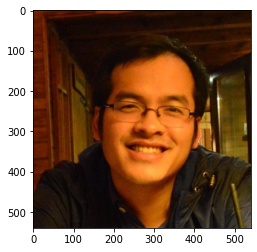

In [2]:
# Reading link and loading image
url = str('https://scontent-lax3-1.xx.fbcdn.net/v/t1.6435-9/71014837_10220741952001200_5455837337667764224_n.jpg?_nc_cat=105&ccb=1-7&_nc_sid=09cbfe&_nc_ohc=Up8dHBJCH9MAX8O673i&_nc_ht=scontent-lax3-1.xx&oh=00_AfD3RuBgdrUgIdLbm5_Hzp-gtlHyhzDZ92jVT4XfY65wFg&oe=63D9F004')
with urllib.request.urlopen(url) as url:
    f = BytesIO(url.read())

ig = np.array(Image.open(f))
print('Image shape: %s'%str(ig.shape))

plt.imshow(ig)


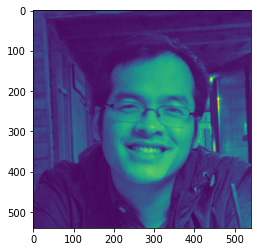

In [3]:
# Convert to grey
ig = ig.dot([0.299, 0.5870, 0.114])
plt.imshow(ig)

In [4]:
# Compressing image using SVD
def SVD_pic(n_evl):       # n_evl: number of highest eigenvalues taken
    # Take m, n shape
    m = ig.shape[0]
    n = ig.shape[1]

    # Singular Value Decomposition
    U, S, V = ln.svd(ig) 

    # Get id position of n highest eigenvalues
    id_trunc = np.argsort(S)[::-1][:n_evl]      
    # Extract matrix U_t, V_t, S_t
    U_t = U[np.ix_(np.arange(m), id_trunc)]
    V_t = V[np.ix_(id_trunc, np.arange(n))]
    S_diag = S[id_trunc]
    S_t = np.zeros((n_evl, n_evl))
    np.fill_diagonal(S_t, S_diag)

    # Return picture
    A = np.dot(U_t, S_t.dot(V_t))

    # Norm Frobenius
    fb = ln.norm(A-ig, 'fro')
    prt_retain = (1-fb**2/np.sum(S**2))*100
    plt.imshow(A)
    print('Percentage of information retained: %.2f%s \n'%(prt_retain, '%'))

Percentage of information retained: 97.94% 



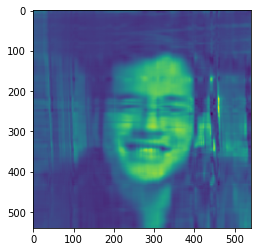

In [5]:
# Compressing image using SVD with 10 highest eigenvalues taken
SVD_pic(10)

Percentage of information retained: 99.19% 



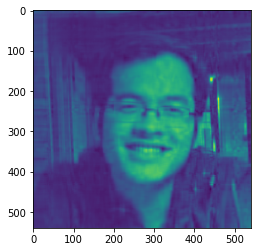

In [6]:
# Compressing image using SVD with 20 highest eigenvalues taken
SVD_pic(20)

Percentage of information retained: 99.73% 



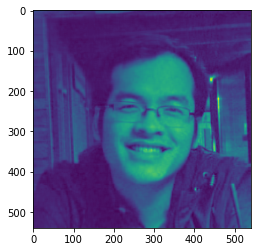

In [7]:
# Compressing image using SVD with 40 highest eigenvalues taken
SVD_pic(40)